# Import Library
Pada tahap ini dilakukan import library untuk pengolahan data, dan pengolahan angka

In [1]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

# Menampilkan Data
Tahap selanjutnya yaitu me-import data, dan menampilkan seluruh data untuk melihat atrbut pada data yang akan diolah

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Menampilkan Jumlah Data
Tahap berikutnya yaitu menampilkan jumlah data berdasarkan negara, tujuan dari menampilakn jumlah negara yaitu untuk melihat negara yang paling dominan terhadap data yang diimportkan.

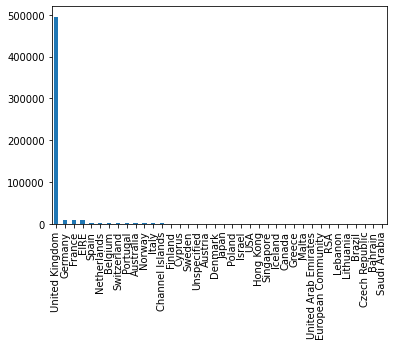

In [3]:
data['Country'].value_counts().plot.bar()

# Analisis Data, dan Preprocessing Data
Tahap pertama yang dilakukan yaitu melihat data apa saja yang kosong, atau missing.


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Tahap selanjutnya yaitu menghilangkan space pada atribut deskripsi

In [5]:
data['Description'] = data['Description'].str.strip()
data['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 541909, dtype: object

Tahap ketiga yaitu melakukan drop pada subset atribut InvoiceNo

In [6]:
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

Tahap berikutnya yaitu melakukan droping pada atribut InvoiceNo yang terdapat char C yang menandakan transaksi menggunakan kartu kredit

In [7]:
data = data[~data['InvoiceNo'].str.contains('C')]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Tahap Selanjutnya yaitu melihat data pada atrbut Country. Tujuan dari tahap ini yaitu menganalisa negara mana saja data yang bisa digunakan nantinya untuk dilakukan pemodelan

In [8]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Tahap selanjutnya yaitu membuat keranjang dengan memilih negara UK sebagai negara yang akan dimodelkan.

In [9]:
basket_uk = (data[data['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [10]:
basket_uk

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
basket_uk.columns

Index(['*Boombox Ipod Classic', '*USB Office Mirror Ball',
       '10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 HANGING EGGS HAND PAINTED', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCIL SMALL TUBE WOODLAND',
       ...
       'wrongly coded 20713', 'wrongly coded 23343', 'wrongly coded-23343',
       'wrongly marked', 'wrongly marked 23343', 'wrongly marked carton 22804',
       'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode',
       'wrongly sold as sets', 'wrongly sold sets'],
      dtype='object', name='Description', length=4175)

Tahap selanjutnya dilakukan one-hot encoding terhadap data basket UK

In [12]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [13]:
basket_encoded = basket_uk.applymap(hot_encode) 
basket_uk = basket_encoded 

In [14]:
basket_uk

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
basket_uk.columns

Index(['*Boombox Ipod Classic', '*USB Office Mirror Ball',
       '10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 HANGING EGGS HAND PAINTED', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES', '12 PENCIL SMALL TUBE WOODLAND',
       ...
       'wrongly coded 20713', 'wrongly coded 23343', 'wrongly coded-23343',
       'wrongly marked', 'wrongly marked 23343', 'wrongly marked carton 22804',
       'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode',
       'wrongly sold as sets', 'wrongly sold sets'],
      dtype='object', name='Description', length=4175)

# Pemodelan Dengan Algoritma Apriori
Pada tahap ini dilakukan penerapan algoritma apriori dengan mengatur minimum support, dan minimum treshold sebagai batasan

In [16]:
frq_items = apriori(basket_uk, min_support = 0.02, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.2) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

# Evaluasi
Pada tahap ini dilakukan evaluasi terhadap hubungan antara masing-masing barang pada transaksi pembelian

In [19]:
evaluasi_model=pd.DataFrame(rules)
evaluasi_model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
164,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029249,0.050035,0.026410,0.902930,18.046041,0.024947,9.786434
166,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030910,0.051267,0.026410,0.854419,16.666089,0.024826,6.516893
26,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203
171,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.027053,0.103820,0.021696,0.801980,7.724749,0.018887,4.525711
147,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037660,0.051267,0.029249,0.776671,15.149556,0.027319,4.248149
...,...,...,...,...,...,...,...,...,...
180,(JUMBO BAG RED RETROSPOT),"(JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...",0.103820,0.027482,0.020571,0.198142,7.209989,0.017718,1.212832
137,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD),0.116034,0.065302,0.021964,0.189289,2.898653,0.014387,1.152936
161,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.116034,0.057642,0.021642,0.186519,3.235826,0.014954,1.158427
145,(WHITE HANGING HEART T-LIGHT HOLDER),(PARTY BUNTING),0.116034,0.085391,0.020250,0.174515,2.043711,0.010341,1.107966
